# The Sparks Foundation - #GRIPAPR21
# Author: Shreya Pimprikar
# Task-1: Prediction using Supervised ML
# Problem Statement: Predict the percentage of a student based on the no. of study hours.

# -----------------------------------------------------------------------------------------------------------

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing and understanding the dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#info() method gives information like no of rows and columns in the dataset along with their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#describe() method is used to view the statistical summary of all the numerical cols in the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Check if there are any null values in the dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Observation- There are no null values in dataset

# Visualizing the data

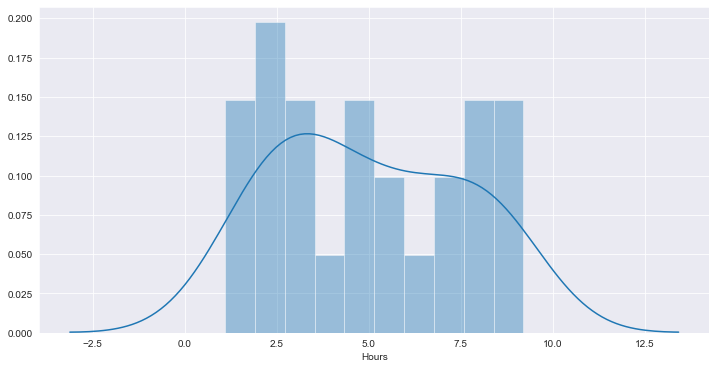

In [8]:
#displays a distribution plot for 'Hours' attribute
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.distplot(df['Hours'],bins=10)

Text(0.5, 1.0, 'Relationship between Hours and Scores')

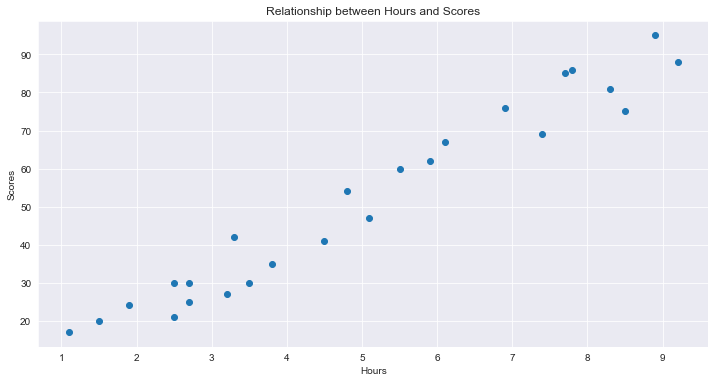

In [11]:
#displays a scatter plot between Scores and Hours attribute
plt.figure(figsize=(12,6))
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Relationship between Hours and Scores')

### Observation- There is a linear  correlation between Hours and Scores

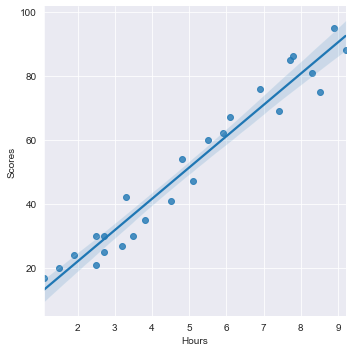

In [35]:
sns.lmplot(x='Hours',y='Scores',data=df)

In [17]:
#Seperating the predictor and the outcome variables
X = df['Hours']
y = df['Scores']

# Splitting the data into training and test set

In [18]:
from sklearn.model_selection import train_test_split
#train_test_split() randomly shuffles and creates train,test set 
#test_size=0.3 states that 30% of the total data is included in test set
#Each time you execute this function, you'll get different entries in different sets. Assign any value to the random_state 
#varibale to get the same datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training and implementing the model

In [19]:
#import the linear regression model
from sklearn.linear_model import LinearRegression

In [20]:
#create an instance of the model and fit it on the training set
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [21]:
#Fitting the model creates a straight line which has following slope and y-intercept 
print(f'Coefficient: {model.coef_}')
print(f'Y-intercept: {model.intercept_}')

Coefficient: [9.96651548]
Y-intercept: 2.1024930747922284


# Visualizing the model

Text(0, 0.5, 'Scores')

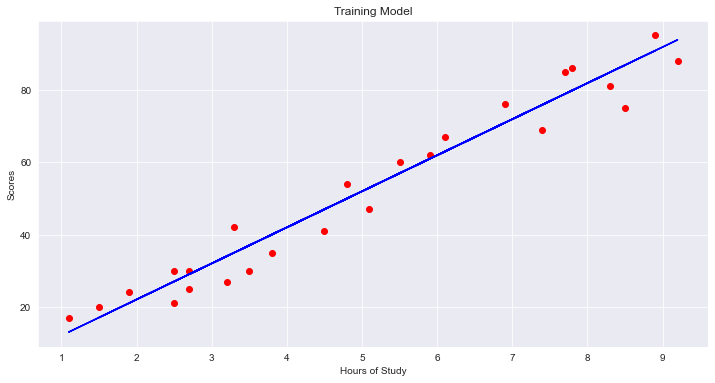

In [36]:
plt.figure(figsize=(12,6))
line = model.coef_*X+model.intercept_
plt.scatter(X,y,color = 'red')#plotting actual training set
plt.plot(X,line,color = 'blue')#plotting the line our model has created 
plt.title('Training Model')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')

### Observation- This graph shows that the line our model has created perfectly fits the data 

# Predicting output

In [37]:
pred = model.predict(X_test.values.reshape(-1,1))

# Comparing actual and predicted output

In [38]:
results = pd.DataFrame({"Actual":y_test,'Predicted':pred})
results

,Actual,Predicted
16,30,27.018782
10,85,78.844662
22,35,39.975252
19,69,75.854708
7,60,56.918328
21,54,49.941767
2,27,33.995343
3,75,86.817875


### Observation- This shows that there's a little difference between actual and predicted values

# Visualizing predicted output

Text(0, 0.5, 'Scores')

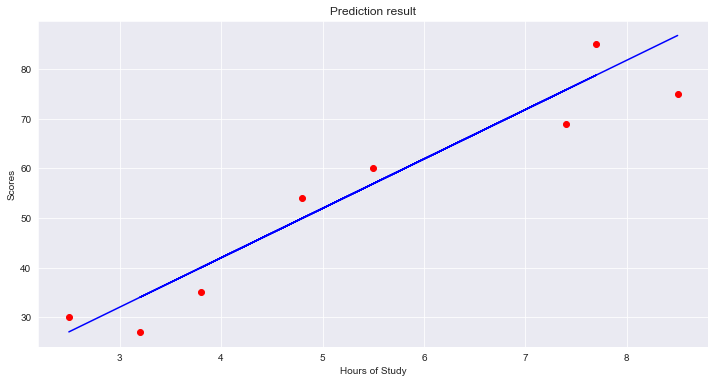

In [39]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color = 'red')#plotting actual test set
plt.plot(X_test,pred,color = 'blue')#plotting predicted values 
plt.title('Prediction result')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')

# Q: What will be predicted score if a student studies for 9.25 hrs/ day?

In [40]:
new_pred = model.predict([[9.25]])
new_pred

array([94.29276126])

### Observation- Model predicts that if a student studies for 9.25 hrs/day, he'll score 94 marks

# Evaluating the model

In [41]:
#import all the evaluation metrices
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('r2score: ',r2_score(y_test,pred))
print('mae:',mean_absolute_error(y_test,pred))
print('mse:',mean_squared_error(y_test,pred))
print('rmse:',np.sqrt(mean_absolute_error(y_test,pred)))

r2score:  0.8999124290533055
mae: 5.864954643694258
mse: 41.63486564552886
rmse: 2.4217668433799027


### Observation- mae,mse,rmse are all loss functions so they should be minimized. R^2 score of 0.89 is pretty good

# Conclusion:
# 1) If a student studies for 9.25 hrs/day, he'll score 94 marks
# 2) R^2 score for model is 0.899